# Deskripsi Proyek: Insurance Company
Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan *machine learning*.

## Tujuan Proyek
- Menemukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Memprediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Memprediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Melindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. 

Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.

## Pra-pemrosesan & Eksplorasi Data

### Inisialisasi

In [1]:
pip install scikit-learn --upgrade

     |████████████████████████████████| 9.6 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 61.8 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'INSTALLER'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# memuat semua library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
import math

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

In [3]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from IPython.display import display

### Memuat Data
Muat data dan lakukan pemeriksaan untuk memastikan data bebas dari permasalahan.

In [4]:
# membaca berkas dan menyimpannya ke df

df = pd.read_csv('/datasets/insurance_us.csv')

In [5]:
# mengganti nama kolom untuk membuat kode terlihat lebih konsisten dengan gayanya.

df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [6]:
# membuat fungsi pengolahan data

def display_information(df):
    print('Head:')
    display(df.head())
    print ('-'*100)
    print('Info:')
    print()
    display(df.info())
    print ('-'*100)
    print('Describe:')
    display(df.describe())
    print ('-'*100)
    print('Columns with nulls:')
    display(get_precent_of_na_df(df,4))
    print ('-'*100)
    print('Shape:')
    print(df.shape)
    print ('-'*100)
    print('Duplicated:')
    print('Duplicate rows:',df.duplicated().sum(),', Duplicate percentage:', (df.duplicated().sum()*100) / df.shape[0],'%')
    
def get_precent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

print_separator = '*' * 100

In [7]:
display_information(df)

Head:


,gender,age,income,family_members,insurance_benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

----------------------------------------------------------------------------------------------------
Describe:


,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


----------------------------------------------------------------------------------------------------
Columns with nulls:


,Missing Values,Percent of Nulls
gender,0,0.0
age,0,0.0
income,0,0.0
family_members,0,0.0
insurance_benefits,0,0.0


----------------------------------------------------------------------------------------------------
Shape:
(5000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Duplicate rows: 153 , Duplicate percentage: 3.06 %


**Kesimpulan:**
- Terdapat 153 baris yang terduplikasi, yaitu 3,06% dari total dataset.
- Hapus baris yang terduplikasi dan dilakukan pengecekan.
- Tipe data untuk kolom `age` kurang sesuai, bertipe: float diubah ke int.

### Pra-pemrosesan data

In [8]:
df = df.drop_duplicates()
print(df.shape)

print('Duplicated:')
print("\033[1m" + 'We have {} duplicated rows.'.format(df.duplicated().sum()) + "\033[0m")

(4847, 5)
Duplicated:
We have 0 duplicated rows.


In [9]:
# mengganti tipe kolom yang tidak sesuai

df['age'] = df['age'].astype('int')
df.dtypes

gender                  int64
age                     int64
income                float64
family_members          int64
insurance_benefits      int64
dtype: object

**Kesimpulan:**
- Tidak terdapat lagi baris yang terduplikat, 153 baris duplikat telah dihapus, yaitu 3,06% dari total dataset.
- Tipe data pada kolom `age` sudah diganti menjadi (int), meskipun tidak terlalu penting.

### Exploratory Data Analysis

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

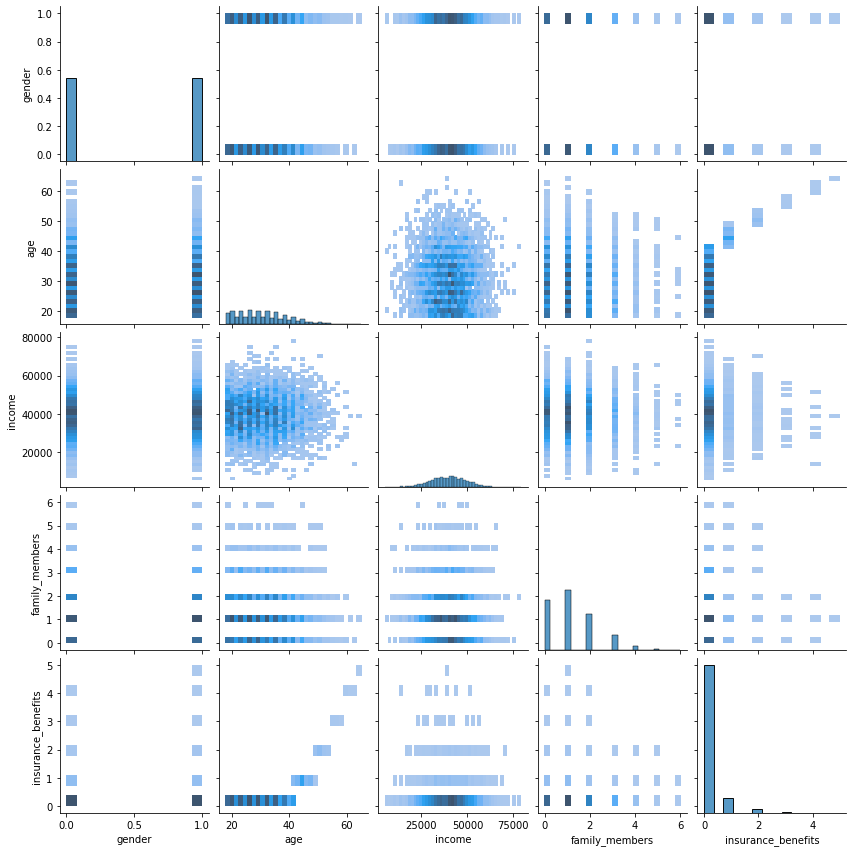

In [10]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

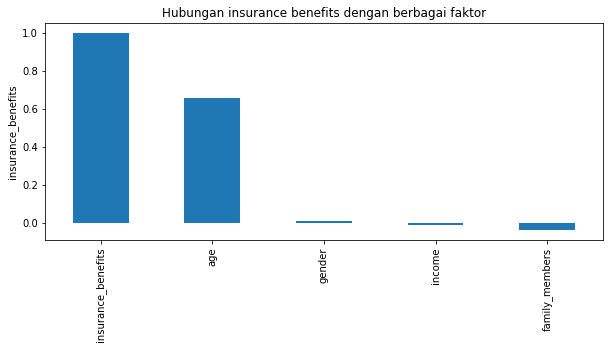

In [11]:
plt.figure(figsize=(10,4))
ax = df.corr()['insurance_benefits'].sort_values(ascending = False).plot(kind='bar')
ax.set(title="Hubungan insurance benefits dengan berbagai faktor",ylabel='insurance_benefits');

**Kesimpulan:**
Berdasarkan grafik di atas, dapat diambil kesimpulan sebagai berikut;
- `insurance benefits` memiliki korelasi positif yang kuat dengan `age`.
- `insurance benefits` memiliki korelasi positif yang sangat lemah dengan `gender`.
- `insurance benefits` memiliki korelasi negatif yang sangat lemah dengan `family_members` dan `income`.

# Tugas 1. Klien yang Mirip

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [12]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [13]:
def get_knn(df, n, k, metric):
    
    """
    Menampilkan k nearest neighbors

    :param df: DataFrame Pandas digunakan untuk menemukan objek-objek yang mirip di dalamnya
    :param n: nomor objek yang dicari k nearest neighbors
    :param k: jumlah k nearest neighbors yang ditampilkan
    :param metric: nama metrik jarak
    """
    np.random.seed(42)
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Mengatur skala data.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [15]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2435,0.0,0.384615,0.594937,0.166667,0
2569,0.0,0.461538,0.388608,0.666667,0
2067,0.0,0.492308,0.275949,0.000000,0
4888,0.0,0.276923,0.567089,0.500000,0
3275,1.0,0.646154,0.651899,0.166667,1


Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

In [16]:
def check_knn_results(df, k, n, scaling='Scaled', metrics=[]):

    for metric in metrics:
        print('{} results for {}'.format(scaling, metric))
        print('-'*50)
        print(get_knn(df, n, k, metric))
        print()

In [17]:
df = df.reset_index(drop=True)

In [18]:
metrics = ['euclidean','manhattan']
check_knn_results(df[feature_names], k=5, n=100, scaling='Unscaled', metrics=metrics)

Unscaled results for euclidean
--------------------------------------------------
      gender  age   income  family_members  distance
100        0   19  37300.0               1  0.000000
1803       0   20  37300.0               2  1.414214
4147       1   19  37300.0               2  1.414214
2569       1   19  37300.0               0  1.414214
1078       0   22  37300.0               3  3.605551

Unscaled results for manhattan
--------------------------------------------------
      gender  age   income  family_members  distance
100        0   19  37300.0               1       0.0
2569       1   19  37300.0               0       2.0
1803       0   20  37300.0               2       2.0
4147       1   19  37300.0               2       2.0
1078       0   22  37300.0               3       5.0



Jawab pertanyaannya

**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?** 

Ya, metrik jarak euclidean dan manhattan tanpa skala dipengaruhi oleh `income`, yang berada pada skala yang berbeda dibandingkan dengan fitur lainnya.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?** 

Ada perbedaan yang mencolok antara 2 metrik terlepas dari penskalaannya. Jarak Euclidean menghasilkan nilai yang lebih besar dari Manhattan.

# Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [19]:
# Hitung tagetnya

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0.5).astype(int)

In [20]:
# periksa ketidakseimbangan kelas dengan value_counts()

df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [21]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [22]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [23]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probabilitasnya: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df), seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probabilitasnya: 0.00
F1: 0.00
Matriks Kesalahan
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

Probabilitasnya: 0.12
F1: 0.13
Matriks Kesalahan
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

Probabilitasnya: 0.50
F1: 0.19
Matriks Kesalahan
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

Probabilitasnya: 1.00
F1: 0.21
Matriks Kesalahan
[[0.         0.88384568]
 [0.         0.11615432]]



In [24]:
train, valid = (train_test_split(df, stratify=df['insurance_benefits_received'], test_size=0.3, random_state=42))

features_train, target_train = train[feature_names], train['insurance_benefits_received']
features_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [25]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [26]:
def build_model(train, target, test, n_neighbors):
    """
    Sesuaikan model dan buat prediksi
    """
    np.random.seed(42)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(features_train, target)
    y_pred = model.predict(test)
    return y_pred

In [27]:
n_neighbors = 10
# menggunakan data yang tidak diskalakan

for k in range(1, n_neighbors+1):
    y_pred = build_model(features_train, target_train, features_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.68
Matriks Kesalahan
[[0.86804124 0.01580756]
 [0.04879725 0.06735395]]

For neighbor k=2
F1: 0.40
Matriks Kesalahan
[[0.87835052 0.00549828]
 [0.08591065 0.03024055]]

For neighbor k=3
F1: 0.41
Matriks Kesalahan
[[0.87353952 0.01030928]
 [0.0838488  0.03230241]]

For neighbor k=4
F1: 0.21
Matriks Kesalahan
[[0.88041237 0.00343643]
 [0.1024055  0.0137457 ]]

For neighbor k=5
F1: 0.22
Matriks Kesalahan
[[0.8790378  0.004811  ]
 [0.10103093 0.01512027]]

For neighbor k=6
F1: 0.02
Matriks Kesalahan
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]

For neighbor k=7
F1: 0.05
Matriks Kesalahan
[[0.88109966 0.00274914]
 [0.11340206 0.00274914]]

For neighbor k=8
F1: 0.03
Matriks Kesalahan
[[8.83161512e-01 6.87285223e-04]
 [1.14089347e-01 2.06185567e-03]]

For neighbor k=9
F1: 0.03
Matriks Kesalahan
[[0.88247423 0.00137457]
 [0.11408935 0.00206186]]

For neighbor k=10
F1: 0.02
Matriks Kesalahan
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]



In [28]:
# mengurangi target menjadi menerima manfaat 1, atau tidak menerima manfaat 0

df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

In [29]:
train, valid = (train_test_split(df_scaled, stratify=df_scaled['insurance_benefits_received'], test_size=0.3, random_state=42))

features_train, target_train = train[feature_names], train['insurance_benefits_received']
features_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [30]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [31]:
for k in range(1, n_neighbors+1):
    y_pred = build_model(features_train, target_train, features_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.94
Matriks Kesalahan
[[0.8790378  0.004811  ]
 [0.00824742 0.10790378]]

For neighbor k=2
F1: 0.91
Matriks Kesalahan
[[0.88109966 0.00274914]
 [0.01786942 0.09828179]]

For neighbor k=3
F1: 0.92
Matriks Kesalahan
[[0.87697595 0.00687285]
 [0.01168385 0.10446735]]

For neighbor k=4
F1: 0.89
Matriks Kesalahan
[[8.83161512e-01 6.87285223e-04]
 [2.33676976e-02 9.27835052e-02]]

For neighbor k=5
F1: 0.91
Matriks Kesalahan
[[0.87972509 0.00412371]
 [0.01580756 0.10034364]]

For neighbor k=6
F1: 0.88
Matriks Kesalahan
[[8.83161512e-01 6.87285223e-04]
 [2.40549828e-02 9.20962199e-02]]

For neighbor k=7
F1: 0.91
Matriks Kesalahan
[[0.88247423 0.00137457]
 [0.01718213 0.09896907]]

For neighbor k=8
F1: 0.89
Matriks Kesalahan
[[0.8838488  0.        ]
 [0.02268041 0.09347079]]

For neighbor k=9
F1: 0.91
Matriks Kesalahan
[[8.83161512e-01 6.87285223e-04]
 [1.92439863e-02 9.69072165e-02]]

For neighbor k=10
F1: 0.88
Matriks Kesalahan
[[0.8838488  0.        ]
 [0.02542955 0.090

**Kesimpulan:**

- Membandingkan KNearestNeighbors antara data yang tidak diskalakan dan yang diskalakan menunjukkan perbedaan besar dalam skor F1; skor F1 terendah yang dihasilkan oleh setiap model yang menggunakan fitur yang diskalakan adalah 88%, sedangkan untuk fitur yang tidak diskalakan adalah 0,02. Jelas, menunjukkan bagaimana penggunaan metrik jarak selama pemasangan berdampak pada prediksi oleh fitur bernilai besar - dalam hal ini pendapatan.
- Model berskala melampaui model dummy.

# Tugas 3. Regresi (dengan Regresi Linear)

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [32]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menambahkan satuan
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # menambahkan satuan
        X2 = np.append(np.ones([X.shape[0], 1]), X, axis=1)
        y_pred = np.dot(X2, self.weights)
        
        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [34]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

linreg = MyLinearRegression()

linreg.fit(X_train, y_train)
print(linreg.weights)

y_test_pred = linreg.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [35]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

linreg = MyLinearRegression()

linreg.fit(X_train, y_train)
print(linreg.weights)

y_test_pred = linreg.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


**Kesimpulan:**
- Hanya 66% varian yang dijelaskan oleh fitur saat data tidak diskalakan.
- Tidak ada perbedaan setelah penskalaan skor RMSE atau R2; ini diharapkan karena Regresi Linier membuat prediksi menggunakan unit outputnya, dan membuat penyesuaian yang diperlukan pada unit fiturnya.

# Tugas 4. Pengaburan Data

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [36]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [37]:
X = df_pn.to_numpy()

Membuat matriks acak $P$.

In [38]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Memeriksa apakah matriks $P$ *invertible*
$$
PP^{-1} = P^{-1}P= I
$$

In [39]:
np.dot(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

In [40]:
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

In [41]:
np.dot(X, P)

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?
- Tidak dapat diuraikan

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

$$
X'P^{-1} = (XP)P^{-1} = X(PP^{-1})
$$

In [42]:
pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


- Ya, kami dapat memulihkan matriks asli X setelah perkalian matriks hasil X*P dengan kebalikan dari P

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [43]:
# data asli

pd.DataFrame(X, columns=feature_names).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [44]:
# data yang sudah ditransformasikan

pd.DataFrame(np.dot(X, P), columns=feature_names).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [45]:
# data yang telah dipulihkan ke semula

pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

- Alasan matriks yang dipulihkan tidak persis sama dengan matriks asli adalah karena kesalahan floating point - hanya ada sejumlah bit yang dialokasikan untuk menyimpan bilangan aslinya.

##  Buktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk $w_P$ di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Bukti analitis**

Distribusi:

$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Dengan mentranspose matriks, kita dapatkan:

$$
w_P = [(XP)^T XP]^{-1} P^T X^T y
$$

Mengatur ulang ketentuan di dalam tanda kurung siku:

$$
w_P = [P^T X^T XP]^{-1} P^T X^T y
$$

Memperluas ketentuan di dalam tanda kurung siku:

$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Menggunakan identitas perkalian:

$$
(P^T)^{-1}P^T = P^T(P^T)^{-1} = I
$$

Persamaan direduksi menjadi:

$$
w_P = P^{-1}(X^T X)^{-1} IX^T y
$$

Kita dapat lihat:

$$
w = (X^T X)^{-1} X^T y
$$

Ganti w dalam persamaan di atas:

$$
w_P = P^{-1} w
$$

kita mengetahui:

$$
y = Xw
$$

Prediksi dari:

$$
y_P = X_P w_P
$$

Mengganti:

$$
w_P
$$

Dalam persamaan di atas, kita dapatkan:

$$
y_P = X_p (P^{-1}w)
$$

Dari mengaburkan input X, kita punya:

$$
X_p = XP
$$

Mengganti dalam persamaan di atas:

$$
y_P = XPP^{-1}w
$$

Dari perkalian identitas, kita mengetahui:

$$
(P^T)^{-1}P^T = P^T(P^T)^{-1} = I
$$

Karena itu, kita menyisakan:

$$
y = y_P = Xw
$$

**Jawaban**

- Bukti analitis membuktikan bahwa seharusnya tidak ada dampak terhadap kualitas nilai regresi meskipun menggunakan metode pengaburan, karena kedua nilai prediksi (sebelum dan setelah pengaburan) adalah sama.
- Kualitas model tetap sama untuk kedua set parameter: fitur asli dan fitur setelah perkalian.

## Uji Regresi Linear dengan Pengaburan Data

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- Gambarkan $P$ dari distribusi yang diseragamkan
- Gunakan $XP$ sebagai matriks fitur baru 

In [46]:
# membuat matriks persegi P dari angka random

def generate_square_matrix(num_features, seed=42):
    
    rng = np.random.default_rng(seed=seed)
    return rng.random(size=(num_features, num_features))

In [47]:
P = generate_square_matrix(4, seed=1234)

In [48]:
# memeriksa apakah matriks bisa dibalik (invertible)

def is_invertible(P):
    
    return np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

In [49]:
is_invertible(P)

True

**Menggunakan data asli, yang dikaburkan**

In [50]:
X = df[['age','gender','income','family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

linreg = MyLinearRegression()

linreg.fit(X_train, y_train)
print(linreg.weights)

y_test_pred = linreg.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736747 -0.08612857 -0.09935604  0.15099254  0.06991959]
RMSE: 0.36
R2: 0.66


**Menggunakan data skala, yang dikaburkan**

In [51]:
X = df_scaled[['age','gender','income','family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

linreg = MyLinearRegression()

linreg.fit(X_train, y_train)
print(linreg.weights)

y_test_pred = linreg.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.97736673  0.36150371 -1.23349037  3.3150945  -2.35958849]
RMSE: 0.36
R2: 0.66


## Kesimpulan

- Hasilnya menunjukkan bahwa bahkan setelah mengaburkan data, skor RMSE dan R2 dari model Regresi Linier adalah identik (sama); terlepas dari apakah data diskalakan atau tidak.

**Ringkasan**

- Menggunakan KNearestNeighbhors untuk menemukan pelanggan yang dekat dengan pelanggan tertentu; solusinya ditingkatkan dengan penskalaan data, dan menggunakan metrik Euclidean untuk meningkatkan prediksi.

- Membuat model untuk membantu tim pemasaran memprediksi apakah pelanggan akan menerima manfaat asuransi atau tidak. Dan, model yang dihasilkan dengan data yang diskalakan, tampil sangat baik dibandingkan dengan model dummy. Model yang dihasilkan memiliki skor F1 sebesar 92% pada set validasi.

- Membuat model LinearRegression pada data yang diskalakan dan tidak diskalakan, untuk memprediksi jumlah manfaat asuransi yang akan diterima pelanggan baru; model menghasilkan skor R2 yang cukup tinggi 66%. Apa yang diamati adalah bahwa penskalaan tidak memengaruhi hasil.

- Mengaburkan data, dan menunjukkan secara analitik bahwa tidak ada perbedaan antara data yang disamarkan dan data asli.

- Membuktikan ini secara komputasi, dengan membangun model LinearRegression menggunakan data yang dikaburkan, dan skor RMSE dan R2 yang dihasilkan identik dengan yang diperoleh dengan memodelkan data asli.

# Daftar Periksa

Ketik 'x' untuk memeriksa. Lalu tekan Shitf+Enter

- [x]  Jupyter Notebook dibuka
- [ ]  Tidak ada kesalahan kode
- [ ]  Sel disusun sesuai urutan yang logis dan eksekusi
- [ ]  Tugas 1 telah dikerjakan
    - [ ]  Ada prosedur yang bisa menampilkan k klien yang mirip dengan klien tertentu
    - [ ]  Prosedur diuji untuk keempat kombinasi yang diusulkan
    - [ ]  Pertanyaan terkait skala/jarak sudah terjawab
- [ ]  Tugas 2 telah dikerjakan
    - [ ]  Telah dibuat model klasifikasi acak untuk semua level probabilitas
    - [ ]  Model klasifikasi kNN telah dibuat dan diuji, baik untuk data asli maupun untuk data yang telah diberi skala. Metrik F1 telah diperhitungkan.
- [ ]  Tugas 3 telah dikerjakan
    - [ ]  Solusi regresi linear diimplementasikan menggunakan pengoperasian matriks.
    - [ ]  RMSE telah dihitung untuk solusi yang diimplementasikan.
- [ ]  Tugas 4 telah dikerjakan
    - [ ]  Data dikaburkan dengan matriks P acak dan *invertible*
    - [ ]  Data yang dikaburkan telah dipulihkan, ada beberapa contoh yang ditampilkan
    - [ ]  Terdapat bukti analitis bahwa transformasi tidak mempengaruhi RMSE
    - [ ]  Terdapat bukti perhitungan bahwa transformasi tidak memengaruhi RMSE
- [ ]  Ada kesimpulan

# Apendiks 

## Apendiks A: Menulis Rumus di Jupyter Notebooks

Anda dapat menulis rumus di Jupyter Notebook dalam bahasa *markup* yang disediakan oleh sistem penerbitan berkualitas tinggi bernama $\LaTeX$ (diucapkan "Lah-tech"), dan rumus tersebut akan terlihat seperti rumus yang ada di buku teks.

Untuk memasukkan rumus ke dalam teks, letakkan tanda dolar (\\$) sebelum dan sesudah teks rumus. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Jika rumus harus ditulis dalam satu paragraf tersendiri, letakkan dua tanda dolar (\\$\\$) sebelum dan sesudah teks.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Bahasa markup [LaTeX](https://en.wikipedia.org/wiki/LaTeX) sangat populer di kalangan orang-orang yang menggunakan rumus dalam artikel, buku, dan teks. Bahasa tesebut memang tampak rumit, tetapi dasarnya sebenarnya mudah. Periksa dua halaman [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) berikut untuk mempelajari cara membuat rumus yang paling umum.

## Apendiks B: Properti Matriks

Matriks memiliki banyak properti di Aljabar Linear. Beberapa di antaranya ada di daftar berikut yang dapat membantu pembuktian analitis dalam proyek ini.

<table>
<tr>
<td>Pendistribusian</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-komutativitas</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Properti asosiatif dari perkalian</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Properti identitas perkalian</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilitas dari transposisi hasil kali matriks,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>